In [1]:
import numpy as np
import numpy.fft as fft
from glob import glob
from pathlib import PurePath,Path
import matplotlib.pyplot as plt

from champ_optics_Model import MCMC_Model,get_mean_err

c:\Users\xiaod\.conda\envs\CCATholo\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def plot_meas(data_List,data_f_List):
    #fig = plt.figure(figsize=(12,10))
    for idx, data in enumerate(data_List):
        x = data[:,0]
        plt.subplot(211)
        plt.plot(
            x,
            data[:,1],
            '*-',
            label=f"{data_f_List[idx].split('/')[-1]}"
        )
        plt.legend(fontsize=5)
        plt.xlabel(r'$\Delta z$ [mm]')

        plt.subplot(212)
        freq = fft.fftshift(
            fft.fftfreq(
                data.shape[0],
                np.diff(x).mean()
            )
        )
        delta_x = np.diff(x).mean()
        spectrum = fft.fftshift(fft.fft(data[:,1])) / (freq.size)
        plt.plot(
            1./freq,
            np.abs(spectrum),'*-',
            label=f"{data_f_List[idx].split('/')[-1]}"
        )
        plt.xscale('log')
        plt.yscale('log')
        plt.legend(fontsize=12)
        
        plt.xlabel(r'$\lambda \ [\mathrm{mm}]$')
    plt.subplot(211)
    plt.grid(which='both', axis='both')
    plt.subplot(212)
    plt.grid(which='both', axis='both')
    plt.tight_layout()

def get_samples(data_List):
    data_samples=np.zeros([data_List[0].shape[0],len(data_List)])
    for idx, data in enumerate(data_List):
        data_samples[:,idx] = data[:,1]
    x_vec=data_List[0][:,0]

    data_samples_zp = data_samples.copy()
    freq_vec = fft.fftshift(
        fft.fftfreq(
            data_samples_zp.shape[0], 
            np.diff(x_vec).mean()
            )
        )
    spec_samp = fft.fftshift(
        fft.fft(data_samples_zp, axis=0) / (len(freq_vec) // 2)
        )
    
    return x_vec, data_samples, freq_vec, spec_samp
    
def plot_correct(x_vec,samples,f_vec,spec):
    fig = plt.figure(figsize=(12,10))
    plt.subplot(311)
    samples=samples-samples.mean(axis=0)
    mean,err = get_mean_err(samples)
    spec_mean,spec_err = get_mean_err(np.abs(spec))
    plt.errorbar(
        x_vec,
        mean,
        yerr=err,
        marker='.', ls='--', color=f'gray',
        label=f"all data",
        capsize=3, markeredgewidth=2,
        fillstyle='none'
    )
    plt.grid(which='both', axis='both')
    plt.legend()
    plt.xlabel(r'$\Delta z$ [mm]')

    plt.subplot(312)
    plt.errorbar(
        1./f_vec,
        spec_mean,
        yerr=spec_err,
        marker='.', ls='--', color=f'gray',
        label=f"all data",
        capsize=3, markeredgewidth=2,
        fillstyle='none'
    )
    plt.xscale('log')
    plt.yscale('log')

    plt.grid(which='both', axis='both')
    plt.legend()
    plt.xlabel(r'$\lambda \ [\mathrm{mm}]$')

    plt.subplot(313)
    plt.errorbar(
        f_vec,
        spec_mean,
        yerr=spec_err,
        marker='.', ls='--', color=f'gray',
        label=f"all data",
        capsize=3, markeredgewidth=2,
        fillstyle='none'
    )
    # plt.xscale('log')
    plt.yscale('log')

    plt.grid(which='both', axis='both')
    plt.legend()
    plt.xlabel(r'$k \ [\mathrm{mm}^{-1}]$')
    plt.tight_layout()
    

In [8]:
##inputs
Data_folder_list=['./4_30/test_93cm/','./4_30/test_1_47m/',
                  './4_30/test_1_95m/','./4_30/test_2_49m/']
keywords_list=['D_93cm_paper_*','D_1_47m_paper_*','D_1_95m_*','D_2_49m_*']

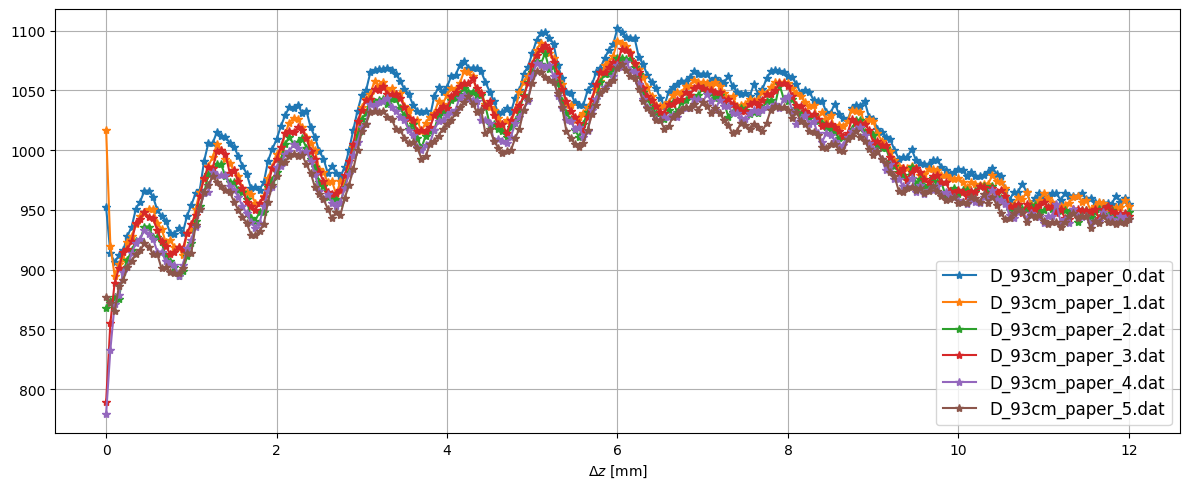

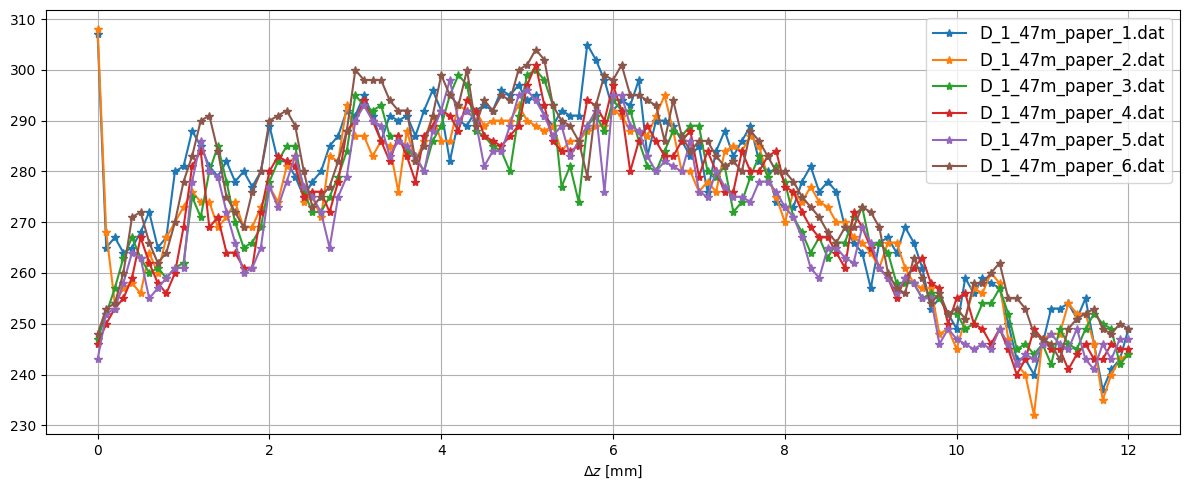

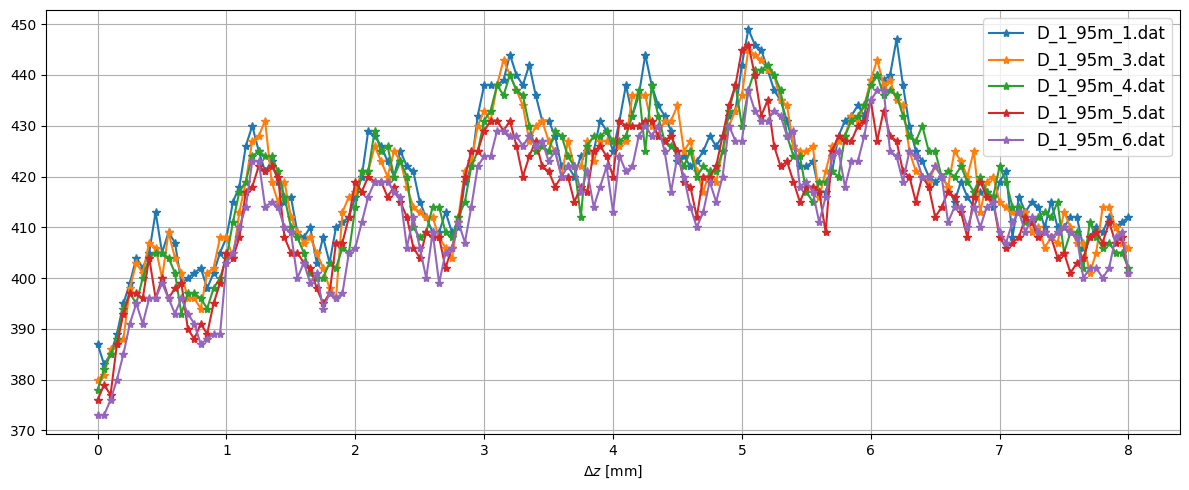

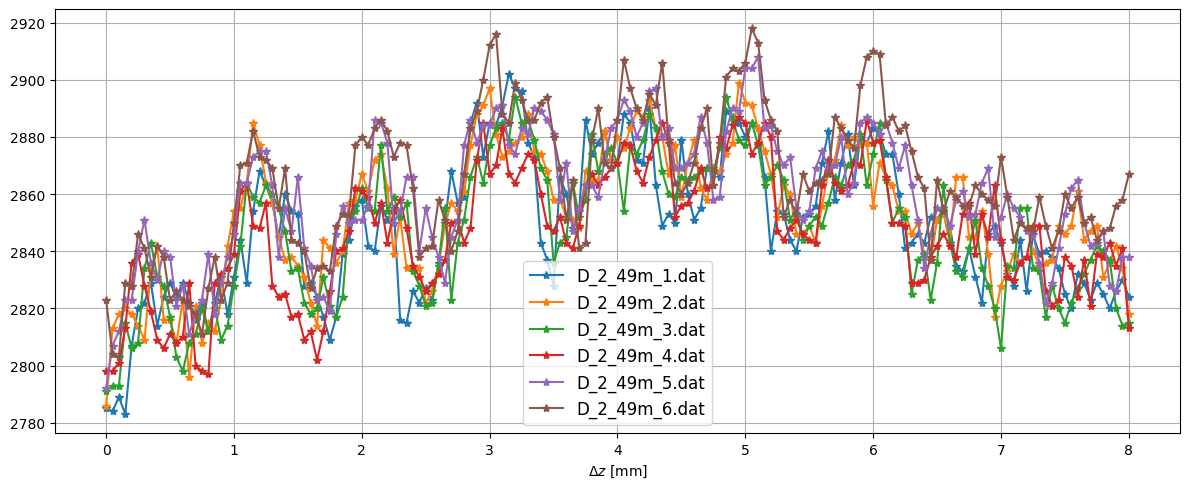

In [32]:
for i, folder in enumerate(Data_folder_list):
    D_folder=PurePath(folder+'find_focus/')
    keywords=keywords_list[i]
    data_file_list= sorted(glob(str(D_folder / keywords)))
    data_List = [
        np.genfromtxt(data_file) for data_file in data_file_list
    ]
    fig = plt.figure(figsize=(12,5))
    for idx, data in enumerate(data_List):
        x = data[:,0]
        plt.plot(
            x,
            data[:,1],
            '*-',
            label=data_file_list[idx].split('\\')[-1]
        )
        plt.legend(fontsize=12)
        plt.xlabel(r'$\Delta z$ [mm]')
    plt.grid(which='both', axis='both')
    plt.tight_layout()
    plt.show()

        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\xiaod\AppData\Local\Temp\ipykernel_9588\172791245.py:23: RuntimeWarning: divide by zero encountered in divide
  1./freq[int(freq.size/2):],


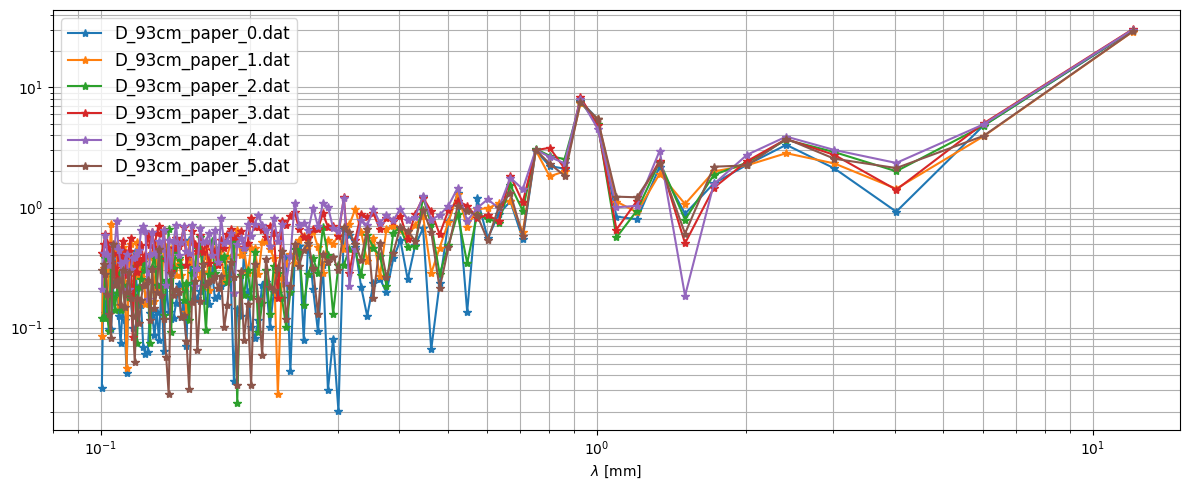

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


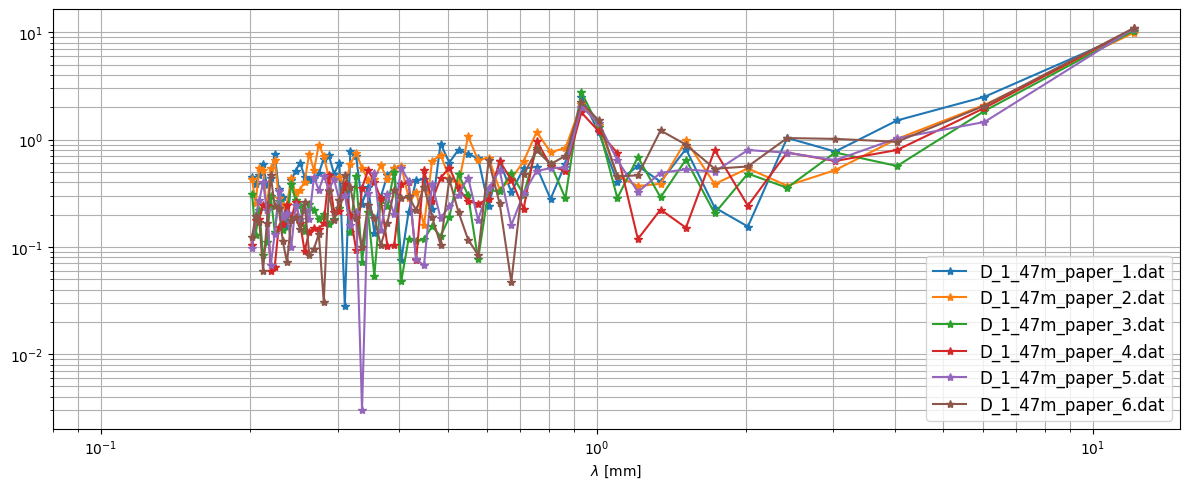

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


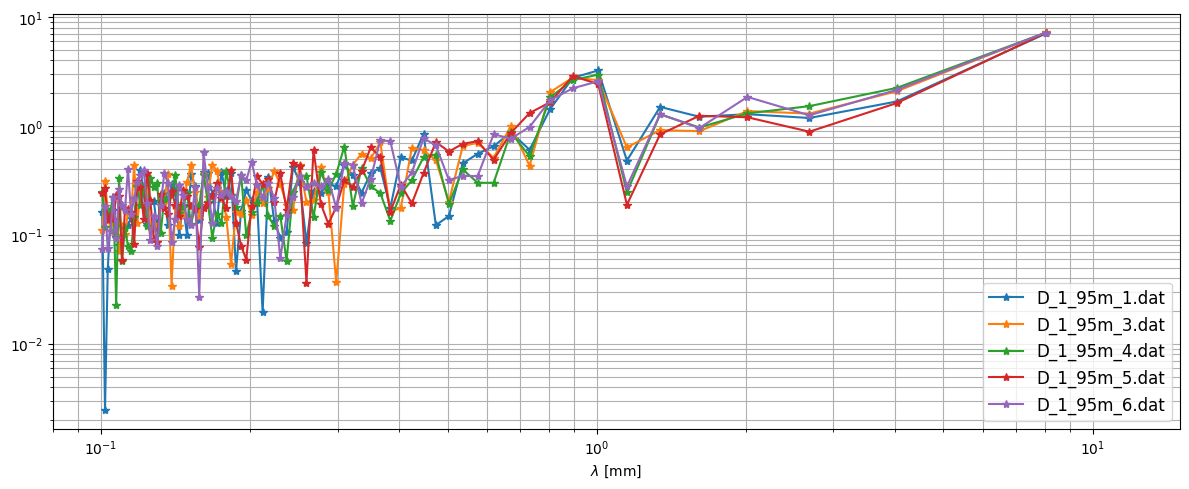

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


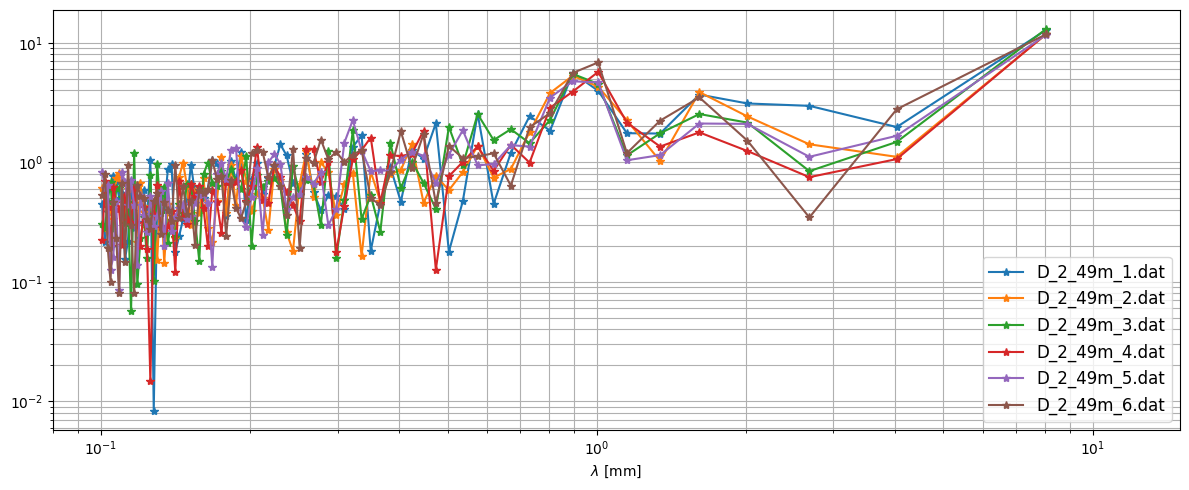

In [41]:
for i, folder in enumerate(Data_folder_list):
    D_folder=PurePath(folder+'find_focus/')
    keywords=keywords_list[i]
    data_file_list= sorted(glob(str(D_folder / keywords)))
    data_List = [
        np.genfromtxt(data_file) for data_file in data_file_list
    ]
    fig = plt.figure(figsize=(12,5))
    for idx, data in enumerate(data_List):
        x = data[:,0]
        plt.legend(fontsize=12)
        plt.xlabel(r'$\Delta z$ [mm]')
        
        freq = fft.fftshift(
            fft.fftfreq(
                data.shape[0],
                np.diff(x).mean()
            )
        )
        delta_x = np.diff(x).mean()
        spectrum = fft.fftshift(fft.fft(data[:,1])) / (freq.size)
        plt.plot(
            1./freq[int(freq.size/2):],
            np.abs(spectrum[int(freq.size/2):]),'*-',
            label=data_file_list[idx].split('\\')[-1]
        )
        plt.xscale('log')
        plt.yscale('log')
        plt.legend(fontsize=12)
        
        plt.xlabel(r'$\lambda \ [\mathrm{mm}]$')
    plt.grid(which='both', axis='both')
    plt.xlim([0.08,15])
    plt.tight_layout()
    plt.show()

    

C:\Users\xiaod\AppData\Local\Temp\ipykernel_9588\2462859122.py:30: RuntimeWarning: divide by zero encountered in divide
  1./f_vec,


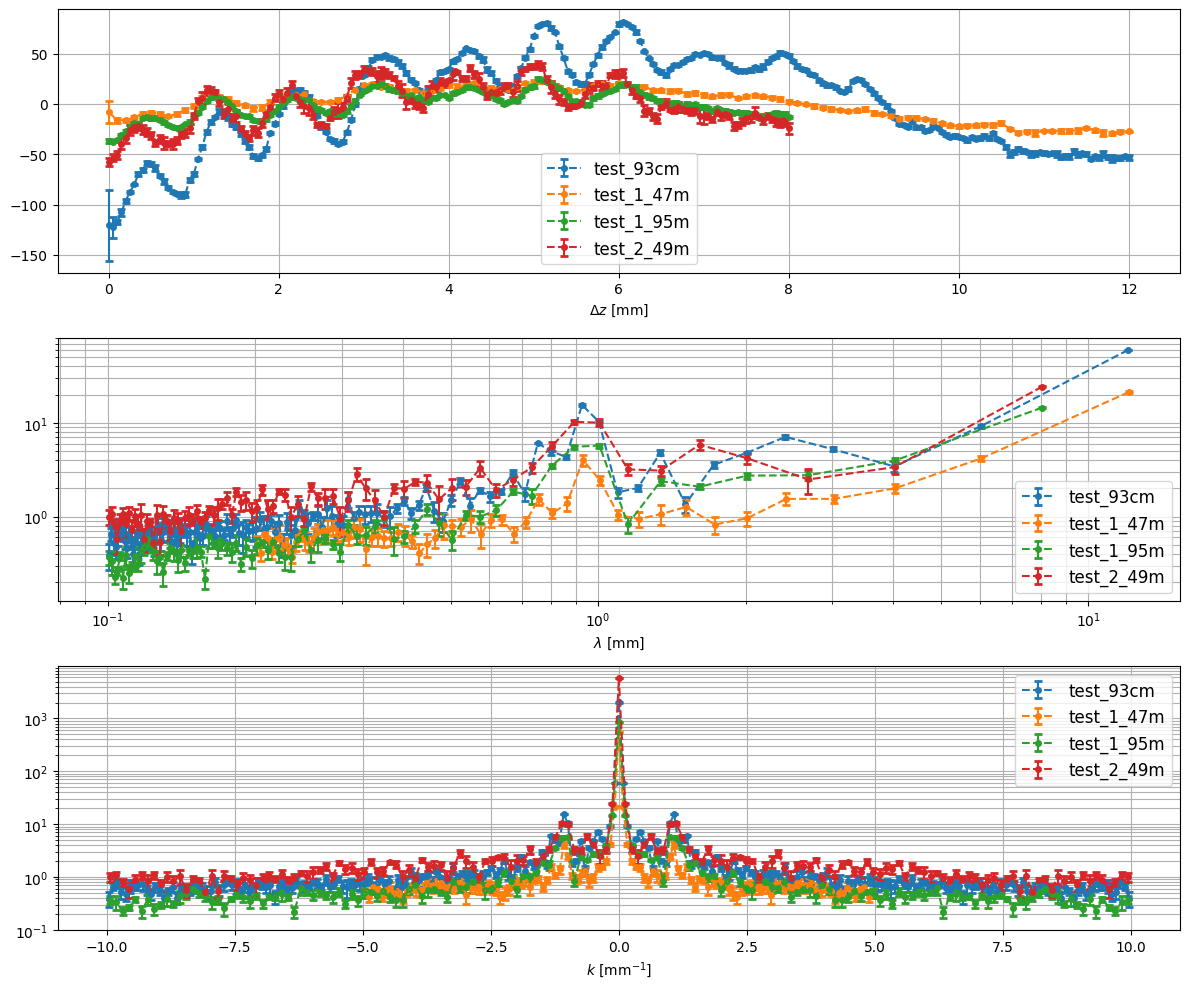

In [19]:
fig = plt.figure(figsize=(12,10))
for i, folder in enumerate(Data_folder_list):
    D_folder=PurePath(folder+'find_focus/')
    keywords=keywords_list[i]
    data_file_list= sorted(glob(str(D_folder / keywords)))
    data_List = [
        np.genfromtxt(data_file) for data_file in data_file_list
    ]
    x_vec, samples, f_vec, spec = get_samples(data_List)

    plt.subplot(311)
    samples=samples-samples.mean(axis=0)
    mean,err = get_mean_err(samples)
    spec_mean,spec_err = get_mean_err(np.abs(spec))
    plt.errorbar(
        x_vec,
        mean,
        yerr=err,
        marker='.', ls='--',# color=f'gray',
        label=f"{folder.split('/')[-2]}",
        capsize=3, markeredgewidth=2,
        fillstyle='none'
    )
    plt.grid(which='both', axis='both')
    plt.legend(fontsize=12)
    plt.xlabel(r'$\Delta z$ [mm]')

    plt.subplot(312)
    plt.errorbar(
        1./f_vec,
        spec_mean,
        yerr=spec_err,
        marker='.', ls='--',# color=f'gray',
        label=f"{folder.split('/')[-2]}",
        capsize=3, markeredgewidth=2,
        fillstyle='none'
    )
    plt.xscale('log')
    plt.yscale('log')

    plt.grid(which='both', axis='both')
    plt.legend(fontsize=12)
    plt.xlabel(r'$\lambda \ [\mathrm{mm}]$')

    plt.subplot(313)
    plt.errorbar(
        f_vec,
        spec_mean,
        yerr=spec_err,
        marker='.', ls='--',# color=f'gray',
        label=f"{folder.split('/')[-2]}",
        capsize=3, markeredgewidth=2,
        fillstyle='none'
    )
    # plt.xscale('log')
    plt.yscale('log')
    plt.legend(fontsize=12)
    plt.xlabel(r'$k \ [\mathrm{mm}^{-1}]$')
    plt.tight_layout()
plt.subplot(311)
plt.grid(which='both', axis='both')
plt.subplot(312)
plt.grid(which='both', axis='both')
plt.subplot(313)
plt.grid(which='both', axis='both')

        

    

In [ ]:
Focus_theory=[]